In [67]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [68]:
#import Ontario greenhouse gas emissions report csv file as single dataframe
ghg_data = pd.read_csv('~/Documents/Continuing Studies/DSI Data Science Certificate Program/Data Visualization/Assignments/GHG_Data_2010_2020_data_Dec162021_UTF8.csv')

In [69]:
#view dataset
ghg_data.columns

Index(['Year', 'Ontario GHG ID', 'Facility Owner', 'Facility Name',
       'Facility City', 'Facility Primary NAICS Code',
       'Carbon dioxide (CO2) from non-biomass in CO2e (t)',
       'Carbon dioxide (CO2) from biomass in CO2e (t)',
       'Methane (CH4) in CO2e (t)', 'Nitrous oxide (N2O) in CO2e (t)',
       'Sulphur hexafluoride (SF6) in CO2e (t)',
       'Hydrofluorocarbons (HFCs) in CO2e (t)',
       'Perfluorocarbons (PFCs) in CO2e (t)',
       'Nitrogen Trifluoride (NF3) in CO2e (t)',
       'Total CO2e from all sources in CO2e (t)',
       'Reporting Amount in CO2e (t)', 'Verification Amount in CO2e (t)',
       'Accredited Verification Body'],
      dtype='object')

In [70]:
ghg_data.dtypes

Year                                                   int64
Ontario GHG ID                                         int64
Facility Owner                                        object
Facility Name                                         object
Facility City                                         object
Facility Primary NAICS Code                            int64
Carbon dioxide (CO2) from non-biomass in CO2e (t)    float64
Carbon dioxide (CO2) from biomass in CO2e (t)        float64
Methane (CH4) in CO2e (t)                            float64
Nitrous oxide (N2O) in CO2e (t)                      float64
Sulphur hexafluoride (SF6) in CO2e (t)               float64
Hydrofluorocarbons (HFCs) in CO2e (t)                float64
Perfluorocarbons (PFCs) in CO2e (t)                  float64
Nitrogen Trifluoride (NF3) in CO2e (t)               float64
Total CO2e from all sources in CO2e (t)                int64
Reporting Amount in CO2e (t)                           int64
Verification Amount in C

In [71]:
#create pivot table to get sum of total CO2e levels for each type of facility
#source: https://www.statology.org/pandas-pivot-table-sum/
ghg_data_pivot = pd.pivot_table(ghg_data, values='Total CO2e from all sources in CO2e (t)', index='Facility Primary NAICS Code', aggfunc='sum')

#view first 5 rows of pivot table
ghg_data_pivot.head

<bound method NDFrame.head of                              Total CO2e from all sources in CO2e (t)
Facility Primary NAICS Code                                         
111419                                                       3798099
111422                                                        130579
211110                                                        347226
211113                                                       1284168
212220                                                       1848598
...                                                              ...
622112                                                        363331
721120                                                         70513
812320                                                         65539
911110                                                        177575
911910                                                        146459

[109 rows x 1 columns]>

In [72]:
#sort by descending order
ghg_data_pivot = ghg_data_pivot.sort_values(by='Total CO2e from all sources in CO2e (t)', ascending=False)
ghg_data_pivot.head(10)

,Total CO2e from all sources in CO2e (t)
Facility Primary NAICS Code,
331110,132141209
221112,101900902
327310,50758765
324110,45771289
322112,33820412
325110,17915504
322121,15185543
221119,13894399
562210,10469491


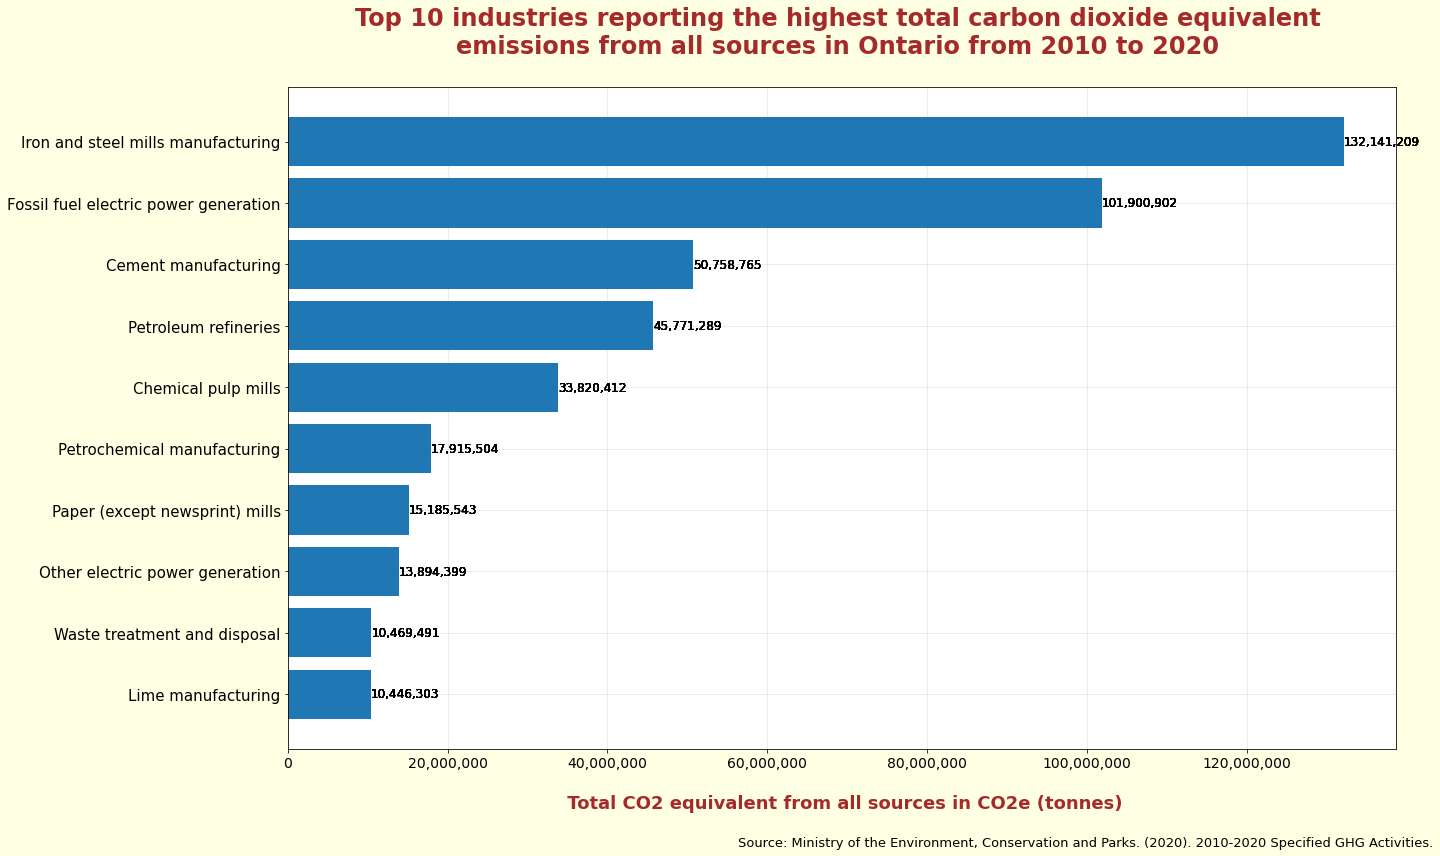

In [188]:
#sources: https://www.python-graph-gallery.com/matplotlib/
#https://www.python-graph-gallery.com/191-custom-axis-on-matplotlib-chart
#https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
#https://www.tutorialspoint.com/how-do-i-change-the-font-size-of-the-scale-in-matplotlib-plots
#https://pythonguides.com/matplotlib-invert-y-axis/
#https://stackoverflow.com/questions/70515542/adding-comma-to-bar-labels?rq=1

#data to plot
totalCO2e = ghg_data_pivot['Total CO2e from all sources in CO2e (t)'][:10]
naics = ("Iron and steel mills manufacturing", "Fossil fuel electric power generation", "Cement manufacturing", "Petroleum refineries", "Chemical pulp mills", "Petrochemical manufacturing", "Paper (except newsprint) mills", "Other electric power generation", "Waste treatment and disposal", "Lime manufacturing")

#create horizontal bar plot
bar_fig, bar_ax = plt.subplots()
bar_fig.set_size_inches(20,12)
bar_fig.patch.set_facecolor('#ffffe4')
bar_ax.barh(naics, totalCO2e)
bar_ax.invert_yaxis() #put in descending order
bar_ax.xaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.0f}'))
bar_ax.set_axisbelow(True)
bar_ax.grid(alpha=0.3)
bar_ax.tick_params(axis='y', labelsize=15)
bar_ax.tick_params(axis='x', labelsize=14)
for c in ax.containers:
    bar_ax.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues], fontsize='12') #adds bar labels and commas
bar_ax.set_title('Top 10 industries reporting the highest total carbon dioxide equivalent \nemissions from all sources in Ontario from 2010 to 2020 \n', fontweight='bold', color = 'brown', fontsize='24')
bar_ax.set_xlabel('\n Total CO2 equivalent from all sources in CO2e (tonnes)', fontweight='bold', color = 'brown', fontsize='18')
plt.annotate('Source: Ministry of the Environment, Conservation and Parks. (2020). 2010-2020 Specified GHG Activities.', (0,0), (450,-100), fontsize=13, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.tight_layout() #prevents trimming of graph
plt.savefig('TotalCO2eBarGraph.png')